In [100]:
import matplotlib.pyplot as plt #Importing
import numpy as np
import pandas as pd

#data = pd.read_csv('cleandata.csv');
data = pd.read_csv('finaldata13dets.csv');

In [101]:
data.head() #To see the clean imported data (first 5)


,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,Seadus,Paragrahv,ParagrahvTais,MaakondNimetus,ValdLinnNimetus,KohtNimetus,...,KM,Lest_X,Lest_Y,SoidukLiik,SoidukRegRiik,SoidukMark,SoidukVlAasta,RikkujaSugu,RikkujaVanus,SyyteoLiik
0,2fd44f1c-6370-18d7-888c-967f31fec8f0,2019-11-06,23:50,Kolmapäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,Harju maakond,Tallinn,Haabersti linnaosa,...,1.0,6588000-6588499,538500-538999,SOIDUAUTO,EST,HONDA,2007,M,35-44,VT
1,2fd44ee0-6370-18d7-888c-967f31fec8f0,2019-11-06,18:19,Kolmapäev,Liiklusseadus,§ 242.,§ 242. Mootorsõiduki- või trammijuhi poolt lii...,Pärnu maakond,Pärnu linn,Pärnu linn,...,1.0,6472500-6472999,529000-529499,SOIDUAUTO,EST,AUDI,2007,M,26-34,VT
2,2fd44ecc-6370-18d7-888c-967f31fec8f0,2019-11-06,18:16,Kolmapäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,Ida-Viru maakond,Toila vald,Kaasikaia küla,...,1.0,6591000-6591499,686500-686999,VEOAUTO,EST,FORD,2016,M,55-64,VT
3,2fd44ec2-6370-18d7-888c-967f31fec8f0,2019-11-06,18:08,Kolmapäev,Liiklusseadus,§ 242.,§ 242. Mootorsõiduki- või trammijuhi poolt lii...,Pärnu maakond,Pärnu linn,Pärnu linn,...,1.0,6472500-6472999,528500-528999,SOIDUAUTO,EST,BMW,2008,M,26-34,VT
4,2fd44eae-6370-18d7-888c-967f31fec8f0,2019-11-06,17:55,Kolmapäev,Liiklusseadus,§ 227.,§ 227. Mootorsõidukijuhi poolt lubatud sõiduki...,Harju maakond,Tallinn,Haabersti linnaosa,...,1.0,6587500-6587999,536000-536499,VEOAUTO,EST,ŠKODA,2018,M,35-44,VT


In [102]:
data['ToimKpv']= data['ToimKpv'].astype(str) 

In [119]:
data['KP'] = data['ToimKpv'].str[5:] #Converting some info
data['year'] = data['ToimKpv'].str[:4]
data['ymonth'] = data['ToimKpv'].str[:7]
data['month'] = data['ToimKpv'].str[5:7]


In [104]:
most_date_nr = data['KP'].value_counts().max() #nr of the most accidents on a date
most_date = data['KP'].value_counts().idxmax() #date with the most accidents

print(most_date)
print(most_date_nr)


04-05
3092


In [105]:
name = []
name.append(most_date)
nr = []
nr.append(most_date_nr)
def holydays(a):
    sum = 0
    for i in data['ToimKpv']:
        if i[5:] == a and i[:4] != '2019':
            sum += 1
    nr.append(sum)
    #print(sum)

In [106]:
#Counting how many misdemeanors happened on holidays
holyday = ['01-01','02-14','02-24','12-24','12-24','12-26','12-31','08-20','06-23','06-24','05-01','11-02','09-30','09-01']

name_holyday = ['New year','Valentine´s day','Independence Day','Christmas eve',
               'Christmas Day','Boxing day','New year´s eve','Day of Restoration of Independence',
               'Victory Day','Midsummer Day','Spring Day','All Souls´ Day','Last day of summer','First day of school']

for i in range(14):
    #print(name_holyday[i])
    name.append(name_holyday[i])
    holydays(holyday[i])

In [107]:
print(name)
print(nr)

['04-05', 'New year', 'Valentine´s day', 'Independence Day', 'Christmas eve', 'Christmas Day', 'Boxing day', 'New year´s eve', 'Day of Restoration of Independence', 'Victory Day', 'Midsummer Day', 'Spring Day', 'All Souls´ Day', 'Last day of summer', 'First day of school']
[3092, 1098, 2257, 2072, 1083, 1083, 1489, 880, 2264, 1927, 1960, 2420, 1682, 1709, 1775]


In [108]:
dataset = pd.DataFrame({'Name': name[:], 'Nr': nr[:]}) #Making a new dataset to the holidays and the nr of misdemeanors

In [109]:
dataset = dataset.sort_values(by='Nr',ascending=False)
print(dataset)

                                  Name    Nr
0                                04-05  3092
11                          Spring Day  2420
8   Day of Restoration of Independence  2264
2                      Valentine´s day  2257
3                     Independence Day  2072
10                       Midsummer Day  1960
9                          Victory Day  1927
14                 First day of school  1775
13                  Last day of summer  1709
12                      All Souls´ Day  1682
6                           Boxing day  1489
1                             New year  1098
4                        Christmas eve  1083
5                        Christmas Day  1083
7                       New year´s eve   880


In [110]:
import matplotlib.pyplot as plt

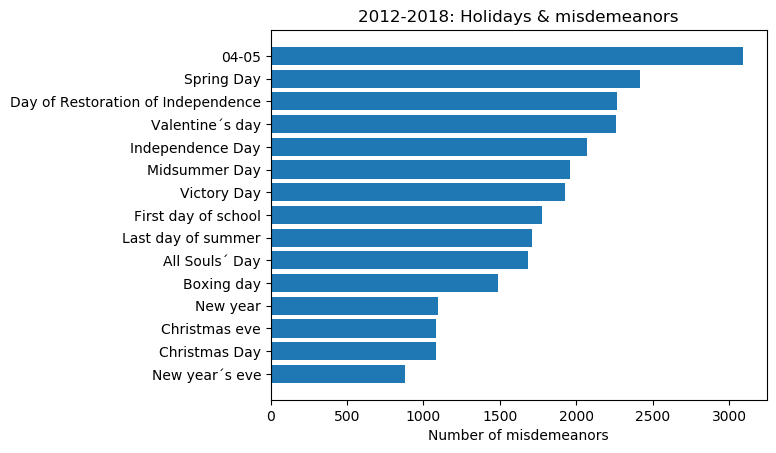

In [111]:
#Makeing a graph -> holidays and misdemeanors
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset.Name))


ax.barh(y_pos, dataset['Nr'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(dataset['Name'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of misdemeanors')
ax.set_title('2012-2018: Holidays & misdemeanors')

plt.show()

In [112]:
#data['KohtNimetus'].value_counts()

In [113]:
#New dataset to analyse months and years
acc = data['ymonth'].value_counts()   
df = acc.rename_axis('Y & M').reset_index(name='counts')
df['month'] = df['Y & M'].str[5:]
df['year'] =df['Y & M'].str[:4]
#df['month'] = df['month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['January','February','March','April','May','June','July','August','September','October','November','December'])
df['month'] = df['month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],[1,2,3,4,5,6,7,8,9,10,11,12])
df = df[df.year != '2019'] #We don't have the full dataset for 2019, so we eliminate it
df = df.sort_values(by=['month'])
print(df)

      Y & M  counts  month  year
47  2015-01    8332      1  2015
36  2013-01    8830      1  2013
43  2014-01    8466      1  2014
6   2012-01   11846      1  2012
76  2016-01    7118      1  2016
67  2017-01    7608      1  2017
89  2018-01    5329      1  2018
74  2017-02    7314      2  2017
34  2014-02    8868      2  2014
54  2015-02    8123      2  2015
46  2013-02    8356      2  2013
2   2012-02   12776      2  2012
40  2016-02    8508      2  2016
90  2018-02    5047      2  2018
55  2017-03    8077      3  2017
81  2018-03    6661      3  2018
23  2016-03    9256      3  2016
0   2012-03   14991      3  2012
20  2015-03    9322      3  2015
11  2013-03    9945      3  2013
18  2014-03    9521      3  2014
70  2017-04    7531      4  2017
1   2012-04   12818      4  2012
10  2014-04   10255      4  2014
52  2016-04    8264      4  2016
33  2015-04    8886      4  2015
85  2018-04    6231      4  2018
15  2013-04    9644      4  2013
22  2016-05    9274      5  2016
71  2017-0

2012    137661
2013    107425
2014    102617
2015    102587
2016     98619
2019     88978
2017     81227
2018     77649
Name: year, dtype: int64


Text(0, 0.5, 'Number of misdemeanors')

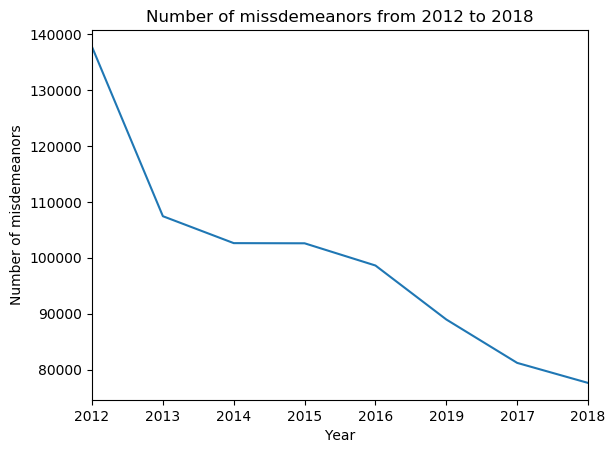

In [114]:
#Graph on Numbers of missdemeanors over the years
#ax = data['year'].value_counts().plot.bar(figsize=(20,10))

print(data['year'].value_counts())
ax =data['year'].value_counts().plot.line() #the graph seems very dramatic because of the startingpoint of 75000 

ax.set_title('Number of missdemeanors from 2012 to 2018')
ax.set_xlabel('Year')
ax.set_ylabel('Number of misdemeanors')

In [120]:
data['month'] = data['month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],[1,2,3,4,5,6,7,8,9,10,11,12])
data = data.sort_values(by=['month'])


3     75781
7     74037
4     73012
8     72396
5     71036
9     69140
2     66678
10    66340
1     65127
6     64831
11    52848
12    45537
Name: month, dtype: int64


Text(0, 0.5, 'Month')

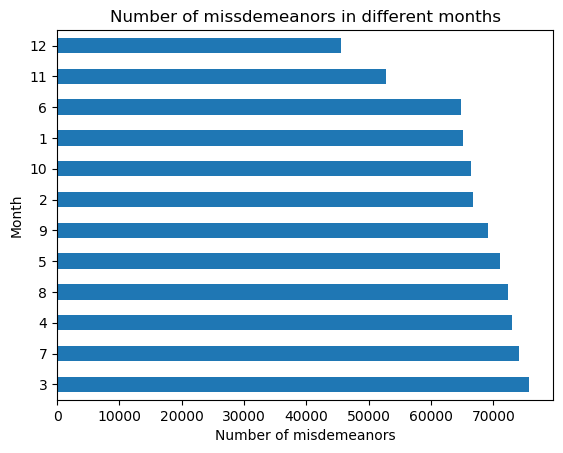

In [126]:
#Graph on misdemeanors in different months
print(data['month'].value_counts())
data = data.sort_values(by=['month'])
ax =data['month'].value_counts().plot.barh() 

ax.set_title('Number of misdemeanors in different months')
ax.set_xlabel('Number of misdemeanors')
ax.set_ylabel('Month')

Text(0.5, 1, 'Heatmap of misdemeanors in a month')

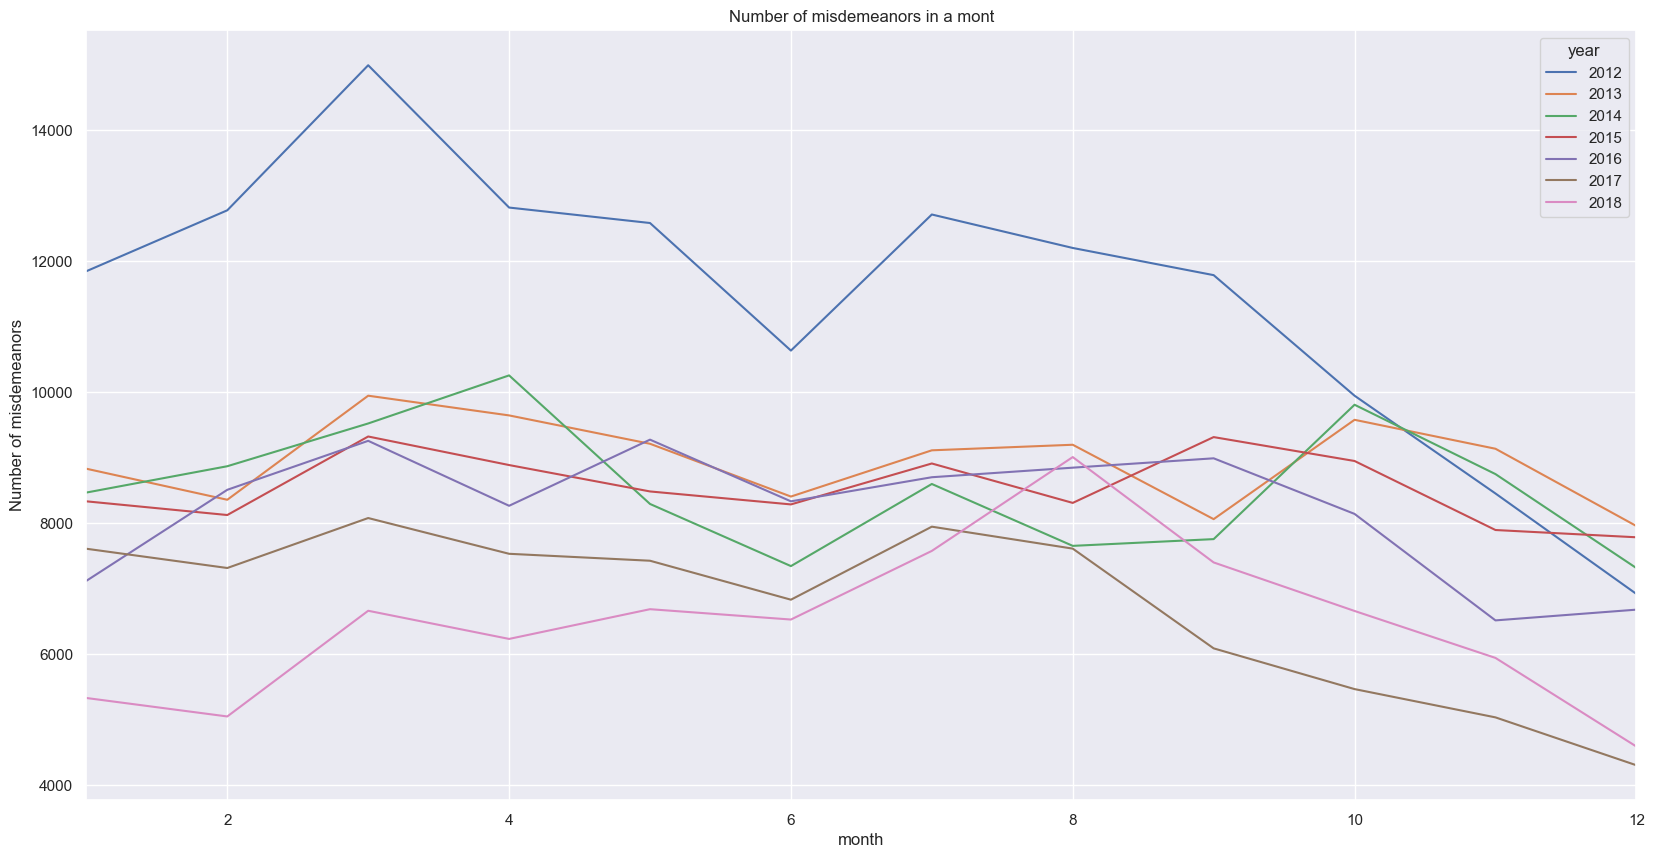

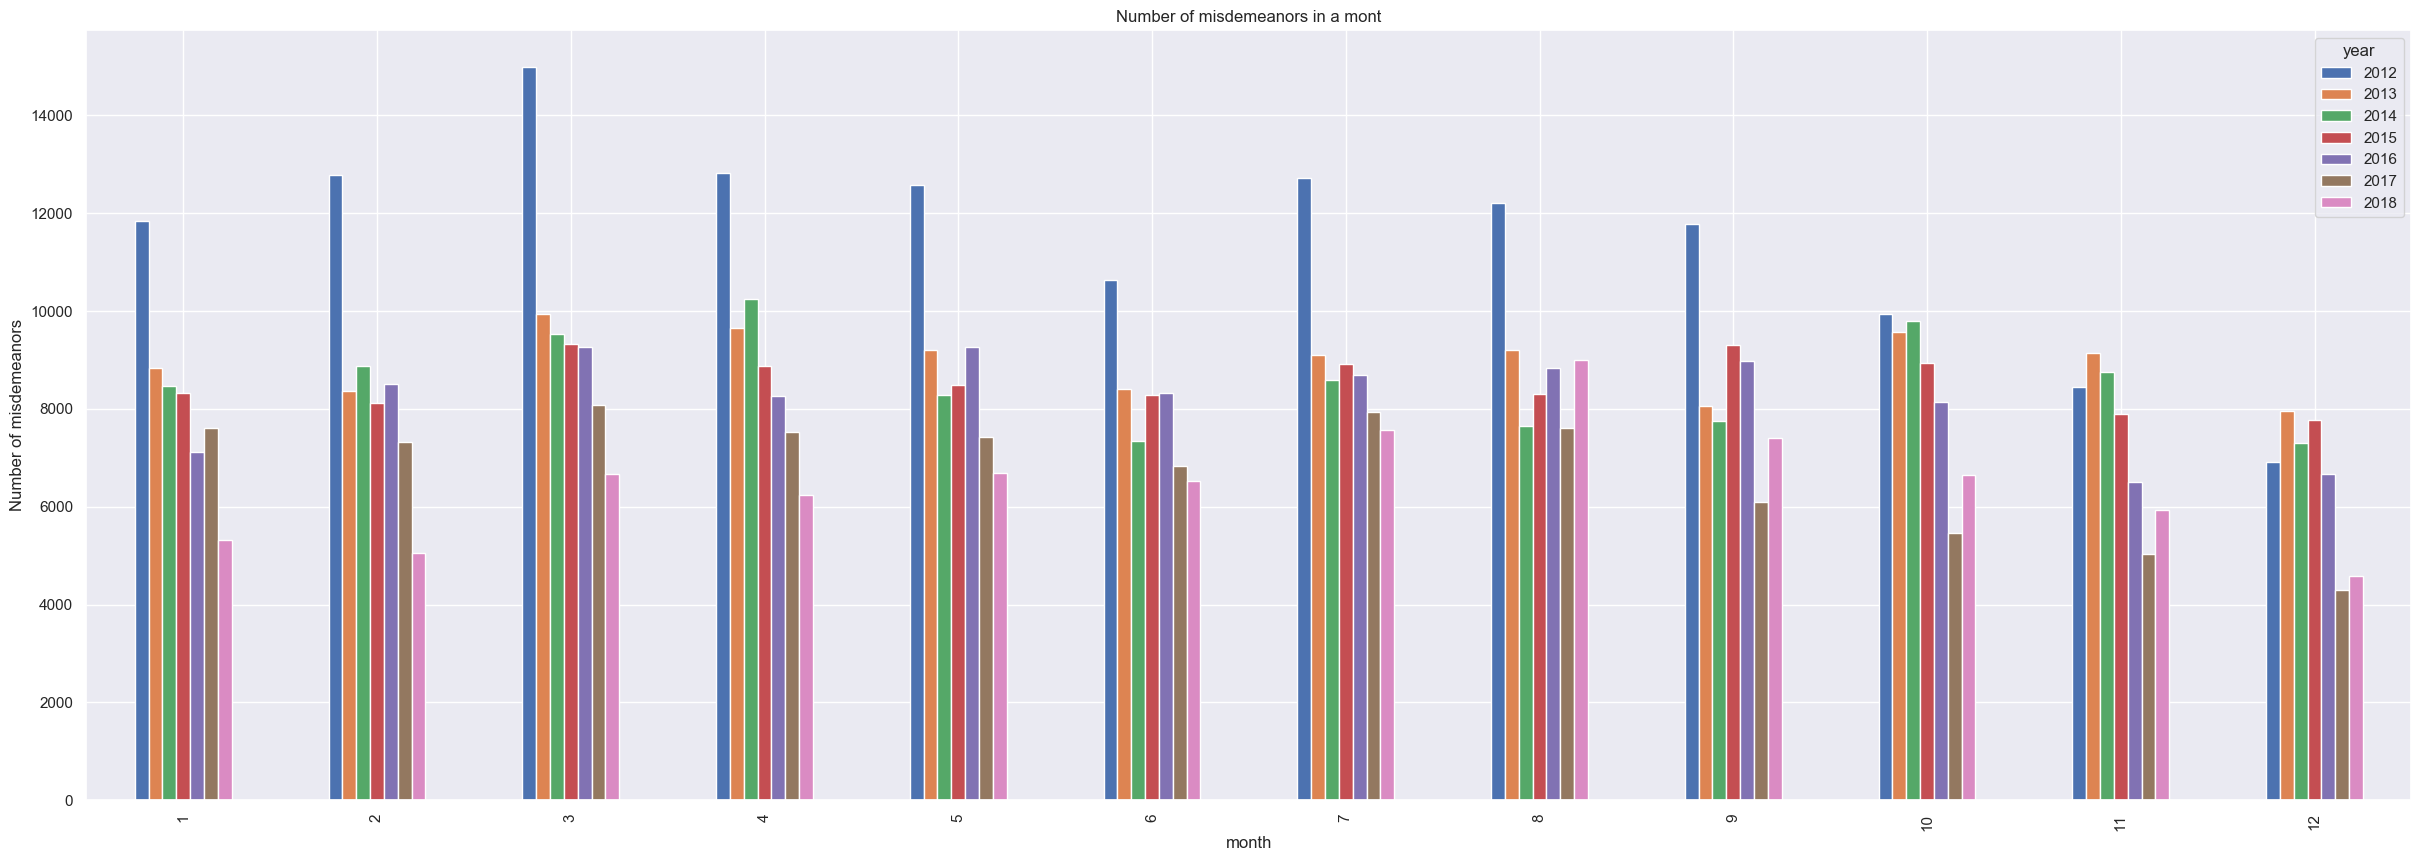

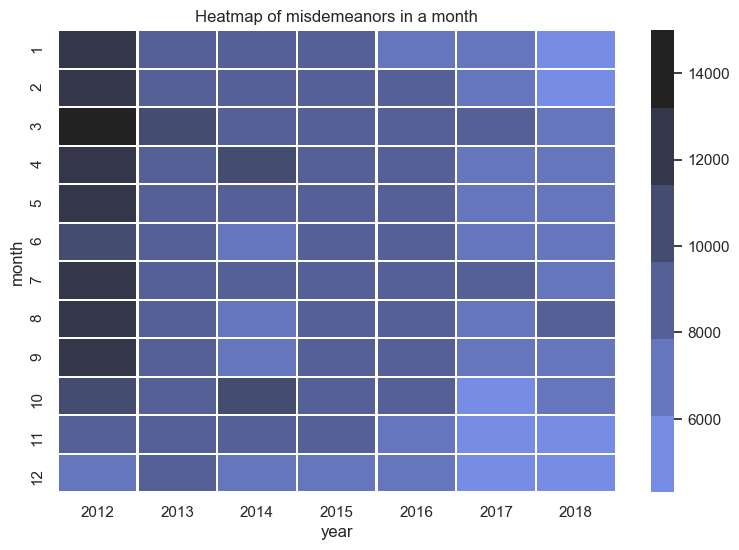

In [116]:
#Graphs on number of misdemeanors in a month
import seaborn as sns; sns.set()
import matplotlib.colors as colors
plot_data = pd.pivot_table(df, values='counts', 
                     index=['month'], 
                     columns='year')

l = plot_data.plot.line(figsize=(20,10)) #lineplot
l.set_ylabel('Number of misdemeanors')
l.set_title('Number of misdemeanors in a mont')

b=plot_data.plot.bar(figsize=(30,10)) #barplot
b.set_ylabel('Number of misdemeanors')
b.set_title('Number of misdemeanors in a mont')

cmap = sns.dark_palette((260, 75, 60), input="husl", reverse=True)
f, ax = plt.subplots(figsize=(9, 6)) #heatmap

sns.heatmap(plot_data,linewidths=.9,cmap =cmap).set_title('Heatmap of misdemeanors in a month')

In [152]:
#Weather data
weather = pd.read_csv('weather.csv');
indexNames = weather[ (weather['TIME'].astype(int) < 2012)].index
weather.drop(indexNames , inplace=True)
weather = weather.drop(columns=['Kuu', 'Flags','DIM3','DIM4','Vaatlusperiood','Flag Codes'])
print(weather.Seirepunkt.value_counts())


places = weather[weather.Seirepunkt != 'Tartu'].index #Finding out more about Tartu
weather.drop(places,inplace=True)



Pärnu           252
Tallinn         252
Jõhvi           252
Tartu           252
Viljandi        252
Narva-Jõesuu    206
Name: Seirepunkt, dtype: int64


In [153]:
#Realizing that we only have information about monthly overviews
temp = weather
d = temp[temp.Näitaja != 'Keskmine õhutemperatuur, °C'].index
temp.drop(d,inplace=True)
temp = temp.sort_values(by=['DIM2'])
temp  

,DIM2,Näitaja,Seirepunkt,TIME,Value
6360,1,"Keskmine õhutemperatuur, °C",Tartu,2012,-5.1
6361,1,"Keskmine õhutemperatuur, °C",Tartu,2013,-7.1
6362,1,"Keskmine õhutemperatuur, °C",Tartu,2014,-8.0
3430,2,"Keskmine õhutemperatuur, °C",Tartu,2012,-10.6
3431,2,"Keskmine õhutemperatuur, °C",Tartu,2013,-3.0
3432,2,"Keskmine õhutemperatuur, °C",Tartu,2014,0.0
754,3,"Keskmine õhutemperatuur, °C",Tartu,2012,0.4
755,3,"Keskmine õhutemperatuur, °C",Tartu,2013,-7.0
756,3,"Keskmine õhutemperatuur, °C",Tartu,2014,2.7
8681,4,"Keskmine õhutemperatuur, °C",Tartu,2014,6.8


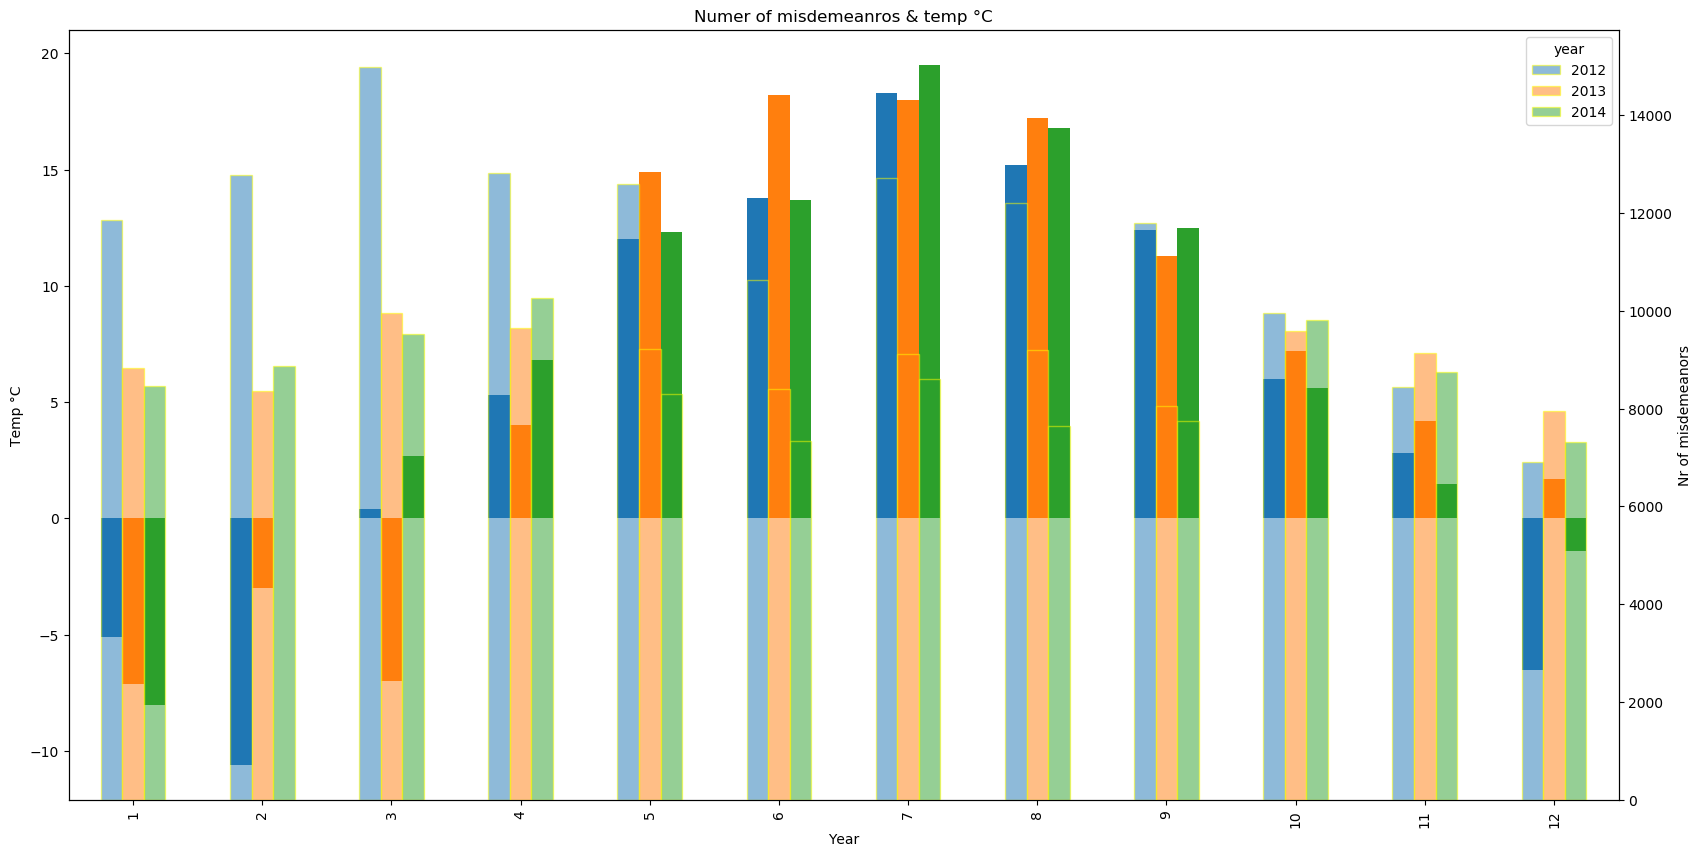

In [173]:
#Making a graph to see if it makes sens to look for dependences
plot_data = pd.pivot_table(temp,values='Value',index= 'DIM2', columns='TIME')

acc_data = df
indexNames = acc_data[ (acc_data['year'].astype(int) > 2014)].index
acc_data.drop(indexNames , inplace=True)

plot_data2 = pd.pivot_table(acc_data, values='counts', index=['month'], columns='year')

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax = plot_data.plot(kind='bar', legend = False, ax=ax,figsize=(20,10))
ax.set_ylabel('Temp °C')
ax.set_xlabel('Year')
ax.set_title('Numer of misdemeanros & temp °C')
ax2.set_ylabel('Nr of misdemeanors')
ax2= plot_data2.plot(kind='bar', legend=True,ax=ax2,figsize=(20,10),alpha=0.5, edgecolor='yellow')


In [ ]:
#Realising that there is litle information to find out the dependences